In [81]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import os

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import pandas as pd
df = pd.read_json("posts.json", encoding='utf-8')

In [4]:
df = df[['text']]
df['text'] = df['text'].replace('\n', ' ')

In [12]:
df.head()

,text
0,@__Rufus_Sol 女…の…子…？(๑°⌓°๑)
1,RT @solgiveaways: Give away with Chameleon Soc...
2,RT @sollgiveaways: 🎁 GIVEAWAY 🎁 \n\n👉Project -...
3,RT @candorwon: https://t.co/6hW7wfVgMN\n— sunj...
4,RT @sol_giveaways: 🎉GIVEAWAY🎉\n\nPrize\n🏆$100 ...


In [39]:
clean = df[~df['text'].str.startswith('RT', na = False)]

In [40]:
# total number of retweets
len(df) - len(clean)

42662

In [41]:
# percentage of tweet
len(clean)/len(df)

0.38171014492753624

In [45]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [72]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,'',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, '')        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,'', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        res = filter(bool, processedText)
        
    return list(res)

In [73]:
# resolve nltk depencies in wordnetlemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/joswx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/joswx/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [76]:
import time
t = time.time()
text = list(clean.text)
processed = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 2 seconds


In [77]:
processed

['10 a sin ver el sol me estoy volviendo loca ',
 'shut up ceddy not in public ',
 'honorable pirate ha been purchased on magiceden v2 this sweet piece sold for 10 sol that 903 usd wagmi ',
 'people with sol cap stop liking my post pls don want fomo ',
 'sea shanty 119 ha just been sold for 10 80 sol on magic eden ',
 'joe shmoe 853 just sold for sol 137 usd transaction detail to get your own lfjoe ',
 'diamond town head 4452 just sold for sol 110 usd transaction detail to get your own diamondtownheads soldiamondheads headsonfire powered by ',
 'sending one lucky guy sol comment ur address below solana nft sol ',
 'done bitcoin ethereum bnb eth bitcoincrash dot mana shib xrp doge babydoge saitama ada sol ftm matic hero sand whex safemoon avax btc look nfts mtv altcoins crypto cryptocurrency cryptocrash 0xb34708bb63455ab0307f2e9475e3e701dd8256b2 ',
 'hi gentleman need only one your btc your power for my little happyness amp freedom please help your help good luck the gentleman ',
 'that

In [78]:
len(processed)

24481

In [79]:
# No of non-english and tweets with all emojis, URLs or @users 
len(clean) - len(processed)

1857

In [86]:
# pickle the processed text list
PATH = './data/'
os.makedirs(PATH, exist_ok=True)
with open(PATH + 'processedtext.pk1', 'wb') as f:
    pickle.dump(processed, f)

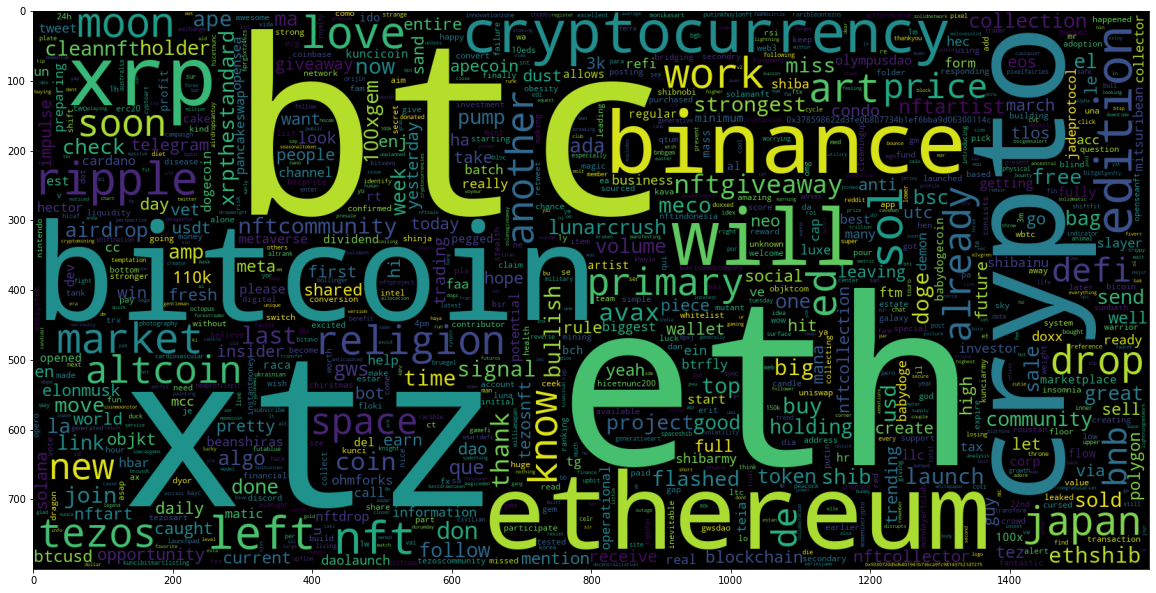

In [89]:
# word-cloud for all tweets
plt.figure(figsize = (20,20))
wc = WordCloud(max_words=1000, width = 1600, 
               height=800, collocations=False).generate(' '.join(processed))
plt.imshow(wc)

In [90]:
24481/len(df)

0.35479710144927534

In [102]:
# sample use case
def load_models():
    
    # Load the vectoriser.
    file = open('./model/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('./model/Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,4], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectoriser, LRmodel, processed)
    os.makedirs('./out/', exist_ok = True)
    df.to_csv("./out/result.csv")